<a href="https://colab.research.google.com/github/DanielAldas/RIIAA5.0_Workshop/blob/main/Building_%26_interpreting_Deep_AmPEP30_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Predicting the antimicrobial activity of short-length peptides**

Notebook by [Dr. Fabien Plisson](https://github.com/plissonf) and [MSc. Daniel Aldas](https://github.com/DanielAldas/)

[Original Paper](https://doi.org/10.1016/j.omtn.2020.05.006)

[Dataset](https://cbbio.online/AxPEP/?action=dataset)

#Downgrade sklearn

In [1]:
! pip uninstall -y scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [2]:
! pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 4.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [3]:
import sklearn
sklearn.__version__

'0.23.1'

# **Install Conda on Google Colab**

In [4]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-26 19:28:09--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  77.1MB/s    in 1.1s    

2022-09-26 19:28:10 (77.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.

# **Download and Install Pfeature (variables)**

In [5]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2022-09-26 19:28:34--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2022-09-26 19:28:34--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519460 (507K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 507.29K  --.-KB/s    in 0.05s   

2022-09-26 19:28:34 (10.5 MB/s) - ‘Pfeature.zip’ saved [519460/519460]



In [6]:
! unzip Pfeature.zip

Archive:  Pfeature.zip
   creating: Pfeature/
  inflating: Pfeature/PKG-INFO       
   creating: __MACOSX/
   creating: __MACOSX/Pfeature/
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
   creating: Pfeature/build/lib/
   creating: Pfeature/build/lib/Pfeature/
  inflating: Pfeature/build/lib/Pfeature/bonds.csv  
   creating: __MACOSX/Pfeature/build/
   creating: __MACOSX/Pfeature/build/lib/
   creating: __MACOSX/Pfeature/build/lib/Pfeature/
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._bonds.csv  
  inflating: Pfeature/build/lib/Pfeature/pfeature.py  
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._pfeature.py  
  inflating: Pfeature/build/lib/Pfeature/AAIndexNames.csv  
  inflating: __MACOSX

In [7]:
%cd Pfeature

/content/Pfeature


In [8]:
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
copying Pfeature/__init__.py -> build/lib/Pfeature
copying Pfeature/pfeature.py -> build/lib/Pfeature
error: can't copy 'Pfeature/ONTAINER-LICENSE': doesn't exist or not a regular file


#Install modlAMP


In [9]:
! pip install modlamp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.0 MB 4.0 MB/s 
     |████████████████████████████████| 154 kB 39.9 MB/s 
     |████████████████████████████████| 15.7 MB 42.4 MB/s 
     |████████████████████████████████| 38.1 MB 65.7 MB/s 
     |████████████████████████████████| 11.2 MB 37.9 MB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 11.3 MB 32.5 MB/s 
     |████████████████████████████████| 6.4 MB 30.0 MB/s 
     |████████████████████████████████| 297 kB 40.0 MB/s 
     |████████████████████████████████| 13.1 MB 22.1 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 40 kB 5.4 MB/s 
     |████████████████████████████████| 3.1 MB 38.4 MB/s 
     |████████████████████████████████| 247 kB 57.8 MB/s 
     |████████████████████████████████| 959 kB 53.9 MB/s 
     |█████████████████████████

#Biopython

In [10]:
! pip install biopython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.0 MB/s 


# **Install CD-HIT**

In [11]:
! conda install -c bioconda cd-hit -y

Solving environment: \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.07.19 |       h06a4308_0         124 KB
    cd-hit-4.8.1               |       hdbcaa40_0         221 KB  bioconda
    certifi-2022.9.14          |   py37h06a4308_0         155 KB
    conda-22.9.0               |   py37h06a4308_0         878 KB
    openssl-1.1.1q             |       h7f8727e_0         2.5 MB
    toolz-0.11.2               |     pyhd3eb1b0_0          49 KB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-hdbcaa40_0
  toolz              pkgs/main/noarch::toolz-0.11.2-pyhd3eb1b0_

# **Load peptide dataset**

In [12]:
! wget https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_po.fasta

--2022-09-26 19:29:48--  https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta’

train_po.fasta      100%[===================>]  51.39K  --.-KB/s    in 0.01s   

2022-09-26 19:29:49 (3.73 MB/s) - ‘train_po.fasta’ saved [52619/52619]



In [13]:
! wget https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_ne.fasta

--2022-09-26 19:29:49--  https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta’

train_ne.fasta      100%[===================>]  55.87K  --.-KB/s    in 0.01s   

2022-09-26 19:29:49 (3.86 MB/s) - ‘train_ne.fasta’ saved [57206/57206]



In [14]:
! cat train_po.fasta

>amp5_30_1
ACSAG
>amp5_30_2
AMVGT
>amp5_30_3
AMVSS
>amp5_30_4
CPFVC
>amp5_30_5
SPGGA
>amp5_30_6
DDDDDD
>amp5_30_7
FRWWHR
>amp5_30_8
RKKWFW
>amp5_30_9
RRWWRF
>amp5_30_10
TVVTNA
>amp5_30_11
TVVTQA
>amp5_30_12
TVYTNA
>amp5_30_13
TVYTQA
>amp5_30_14
CSYTMEA
>amp5_30_15
GSEIQPR
>amp5_30_16
KVFLGLK
>amp5_30_17
LKLLKKL
>amp5_30_18
MRTGNAD
>amp5_30_19
MRTGNAN
>amp5_30_20
VISIIPV
>amp5_30_21
ASILTNAS
>amp5_30_22
FFFLSRIF
>amp5_30_23
FFHLHFHY
>amp5_30_24
KIIFLIAI
>amp5_30_25
PFKLSLHL
>amp5_30_26
QPFSLERW
>amp5_30_27
TCSYTMEA
>amp5_30_28
VAGRAQGM
>amp5_30_29
VRPYLVAF
>amp5_30_30
AHCLAIGRK
>amp5_30_31
ALLLAIRKR
>amp5_30_32
ALRLAIRKR
>amp5_30_33
ALWLAIRKR
>amp5_30_34
ALYLAIRKR
>amp5_30_35
AWKLFDDGV
>amp5_30_36
AWLLAIRKR
>amp5_30_37
DEKGPKWKR
>amp5_30_38
DYHHGVRVL
>amp5_30_39
EPFKISIHL
>amp5_30_40
EPFKLSLHL
>amp5_30_41
FLGFLHHLF
>amp5_30_42
FLGFLKNLF
>amp5_30_43
FLHFLHHLF
>amp5_30_44
GVCDMADLA
>amp5_30_45
GVVPHDFRI
>amp5_30_46
IAKVALKAL
>amp5_30_47
KIKFLKVLT
>amp5_30_48
NIPQLTPTP
>amp5_30_49
NRWCFAGD

In [15]:
! cat train_ne.fasta

>nonamp5_30_1
FPPWE
>nonamp5_30_2
FPPWM
>nonamp5_30_3
IEFFT
>nonamp5_30_4
RYLPT
>nonamp5_30_5
EDRTY
>nonamp5_30_6
FPPWVL
>nonamp5_30_7
GAPMFV
>nonamp5_30_8
KPPWRL
>nonamp5_30_9
NPTNLH
>nonamp5_30_10
DTVNAA
>nonamp5_30_11
MERQVL
>nonamp5_30_12
PIDPGV
>nonamp5_30_13
KPLWRL
>nonamp5_30_14
FGVLNFF
>nonamp5_30_15
GSEIQPR
>nonamp5_30_16
NNLDEIK
>nonamp5_30_17
VPPIGWF
>nonamp5_30_18
EAYAFGL
>nonamp5_30_19
TNDFMRF
>nonamp5_30_20
VIYIFAR
>nonamp5_30_21
DYMGWMDF
>nonamp5_30_22
GCVLLPWC
>nonamp5_30_23
MEDEGAGG
>nonamp5_30_24
SVQFKPRL
>nonamp5_30_25
DEVKIVLD
>nonamp5_30_26
SPPFAPRL
>nonamp5_30_27
TGVAWRIT
>nonamp5_30_28
PTHIKWGD
>nonamp5_30_29
MWPFPSDK
>nonamp5_30_30
EPFKISIHL
>nonamp5_30_31
GPDSSFLRL
>nonamp5_30_32
MAQDAITAV
>nonamp5_30_33
TLTSFGEWR
>nonamp5_30_34
CYIQNCPRG
>nonamp5_30_35
SQPSMRLRF
>nonamp5_30_36
TPTAFYGVR
>nonamp5_30_37
NPQQDFMRF
>nonamp5_30_38
MYKLLIINP
>nonamp5_30_39
AGQDGFMRF
>nonamp5_30_40
YDRYEVVYR
>nonamp5_30_41
CLIQDCPEG
>nonamp5_30_42
NQEGLFHGR
>nonamp5_30_43
GLVPPADKY
>

# **Remove redundant sequences using CD-HIT**

In [16]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Mon Sep 26 19:29:50 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485873

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.09


In [17]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Mon Sep 26 19:29:50 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [18]:
! ls -l

total 652
drwxr-xr-x 3 root root   4096 Jul 28 08:29 build
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
drwxr-xr-x 2 root root   4096 Jul 28 08:32 Pfeature
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
-rw-r--r-- 1 root root    971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root   1265 Sep 29  2020 README
-rw-r--r-- 1 root root   1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root  54341 Sep 26 19:29 train_ne_cdhit.txt
-rw-r--r-- 1 root root  61425 Sep 26 19:29 train_ne_cdhit.txt.clstr
-rw-r--r-- 1 root root  57206 Sep 26 19:29 train_ne.fasta
-rw-r--r-- 1 root root  47229 Sep 26 19:29 train_po_cdhit.txt
-rw-r--r-- 1 root root  56665 Sep 26 19:29 train_po_cdhit.txt.clstr
-rw-r--r-- 1 root root  52619 Sep 26 19:29 train_po.fasta


In [19]:
! grep ">" train_po_cdhit.txt | wc -l

1337


In [20]:
! grep ">" train_po.fasta | wc -l

1529


In [21]:
! grep ">" train_ne.fasta | wc -l

1529


In [22]:
! grep ">" train_ne_cdhit.txt | wc -l

1422


# **Calculate features using the Pfeature library**

Feature classes provided by Pfeature is summarized in the tables below.

**Composition Based Features**

Feature claass | Description | Function
---|---|---
AAC | Amino acid composition | aac_wp
DPC | Dipeptide composition | dpc_wp
TPC | Tripeptide composition | tpc_wp
ABC | Atom and bond composition | atc_wp, btc_wp
PCP | Physico-chemical properties | pcp_wp
AAI | Amino acid index composition | aai_wp
RRI | Repetitive Residue Information | rri_wp
DDR | Distance distribution of residues |ddr_wp
PRI | Physico-chemical properties repeat composition | pri_wp
SEP | Shannon entropy | sep_wp
SER | Shannon entropy of residue level | ser_wp
SPC | Shannon entropy of physicochemical property | spc_wp
ACR | Autocorrelation | acr_wp
CTC | Conjoint Triad Calculation | ctc_wp
CTD | Composition enhanced transition distribution | ctd_wp
PAAC | Pseudo amino acid composition | paac_wp
APAAC | Amphiphilic pseudo amino acid composition | apaac_wp
QSO | Quasi sequence order | qos_wp
SOC | Sequence order coupling | soc_wp

[Pfeature Manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf)

### **Define functions for calculating the different features**

In [23]:
import pandas as pd

In [24]:
# Amino acid composition (AAC)

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature = aac('train_po_cdhit.txt')
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [25]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('train_po_cdhit.txt')
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.00,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,3.45,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,0.00,0.0,0.0,3.45,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,6.90,...,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,3.45,3.45,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Physico-Chemical Properties Composition (PCP)

from Pfeature.pfeature import pcp_wp

def pcp(input):
  a = input.rstrip('txt')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature = pcp('train_po_cdhit.txt')
feature

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,0.000,0.091,0.909,0.091,0.727,0.636,0.091,0.182,0.091,0.000,...,0.273,0.182,0.364,0.818,0.182,-0.345,-0.827,0.489,-0.479,0.230
1,0.000,0.091,0.909,0.909,0.000,0.000,0.000,0.000,0.091,0.000,...,0.091,0.364,0.727,0.909,0.091,1.312,-1.478,2.019,-0.696,-1.419
2,0.091,0.273,0.636,0.000,0.636,0.455,0.182,0.091,0.273,0.091,...,0.455,0.364,0.091,0.455,0.545,-0.231,-0.213,0.410,-0.286,0.289
3,0.091,0.182,0.727,0.000,0.636,0.455,0.182,0.091,0.182,0.091,...,0.455,0.364,0.091,0.455,0.545,-0.315,-0.150,0.329,-0.167,0.075
4,0.000,0.273,0.727,0.000,0.636,0.364,0.182,0.182,0.273,0.000,...,0.545,0.273,0.091,0.455,0.545,-0.326,0.174,0.717,-0.619,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.133,0.067,0.800,0.133,0.667,0.567,0.000,0.067,0.067,0.133,...,0.233,0.133,0.367,0.533,0.467,-0.117,-1.386,-0.471,-0.457,0.210
1333,0.167,0.000,0.833,0.200,0.567,0.500,0.000,0.067,0.000,0.167,...,0.133,0.200,0.400,0.633,0.367,0.409,-1.051,-0.271,-0.091,-0.116
1334,0.300,0.033,0.667,0.233,0.433,0.433,0.167,0.067,0.033,0.300,...,0.267,0.467,0.233,0.433,0.567,0.547,0.208,-0.331,0.521,0.531
1335,0.200,0.133,0.667,0.167,0.467,0.467,0.000,0.000,0.133,0.200,...,0.333,0.100,0.167,0.300,0.700,0.193,-0.438,-0.942,-0.518,0.364


### **Calculate feature for both positive and negative classes + combines the two classes + merge with class labels**

In [27]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature_aac = feature_calc(pos, neg, aac) # AAC
feature_dpc = feature_calc(pos, neg, dpc) # DPC

In [28]:
feature_aac.columns

Index(['AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I',
       'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S',
       'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'class'],
      dtype='object')

#ModlAMP features

In [29]:
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor

In [32]:
import sys
from Bio import SeqIO

In [33]:
def fasta_to_dataframe(file):
    """This function extracts identifier, sequence and sequence lenght from a fasta file and create a pandas DataFrame using this information"""

    with open(file) as fasta_file:
        identifiers = []
        seqs = []
        lenghts = []
        for seq_record in SeqIO.parse(fasta_file, 'fasta'): 
            identifiers.append(seq_record.id)
            seqs.append(str(seq_record.seq))
        
        d = {'id':identifiers, 'sequence':seqs}
        df = pd.DataFrame(data=d)
    return df

In [57]:
pos_df = fasta_to_dataframe(pos)
neg_df = fasta_to_dataframe(neg)

In [58]:
pos_seqs = pos_df.sequence.tolist()
neg_seqs = neg_df.sequence.tolist()

In [72]:
def molecular_descriptors(df='', sec=''):
  # Net charge
  desc=GlobalDescriptor(sec)
  desc.calculate_charge()
  charge=desc.descriptor
  df["Charge"]=charge
  # Isoelectric point (pH = 7)
  desc=GlobalDescriptor(sec)
  desc.isoelectric_point()
  isoelectric=desc.descriptor
  df["Isoelectric_point"]=isoelectric  
  # Aomaticity
  desc=GlobalDescriptor(sec)
  desc.aromaticity()
  aroma=desc.descriptor
  df["Aromaticity"]=aroma
  # Molecular weight
  desc=GlobalDescriptor(sec)
  desc.calculate_MW()
  MW=desc.descriptor
  df["Molecular_weight"]=MW
  # Aliphatic index
  desc=GlobalDescriptor(sec)
  desc.aliphatic_index()
  ali=desc.descriptor
  df["Aliphatic_index"]=ali
  # Hydrophobic ratio
  desc=GlobalDescriptor(sec)
  desc.hydrophobic_ratio()
  hidro=desc.descriptor
  df["Hydrophobic_ratio"]=hidro
  # AASI
  aasi=PeptideDescriptor(sec,"AASI")
  aasi.calculate_global()
  desc_aasi=aasi.descriptor
  df["AASI"]=desc_aasi
  # ABHPRK (modlabs inhouse physicochemical feature scale (Acidic, Basic, Hydrophobic, Polar, aRomatic, Kink-inducer)
  abh=PeptideDescriptor(sec,"ABHPRK")
  abh.calculate_global()
  desc_abh=abh.descriptor
  df["ABHPRK"]=desc_abh
  # Argos hydrophobicity amino acid scale
  argos=PeptideDescriptor(sec,"argos")
  argos.calculate_global()
  desc_argos=argos.descriptor
  df["Argos_hidrophobicity"]=desc_argos
  # Bulkiness
  bulk=PeptideDescriptor(sec,"bulkiness")
  bulk.calculate_global()
  desc_bulk=bulk.descriptor
  df["Bulkiness"]=desc_bulk
  # Charge pH 7
  char7=PeptideDescriptor(sec,"charge_phys")
  char7.calculate_global()
  desc_char7=char7.descriptor
  df["Charge_pH7"]=desc_char7
  #Ejemplo de calculo de un descriptor global de modlamp (Charge acid)
  chara=PeptideDescriptor(sec,"charge_acid")
  chara.calculate_global()
  desc_chara=chara.descriptor
  df["Charge_acid"]=desc_chara
  # Eisenberg_hydrophobicity
  eisen=PeptideDescriptor(sec,"eisenberg")
  eisen.calculate_global()
  desc_eisen=eisen.descriptor
  df["Eisenberg"]=desc_eisen
  # Energies of insertion)
  ez=PeptideDescriptor(sec,"Ez")
  ez.calculate_global()
  desc_ez=ez.descriptor
  df["Ez"]=desc_ez
  # Flexibility
  flex=PeptideDescriptor(sec,"flexibility")
  flex.calculate_global()
  desc_flex=flex.descriptor
  df["Flexibility"]=desc_flex
  # Amino acid side chain composition, polarity and molecular volume
  gran=PeptideDescriptor(sec,"grantham")
  gran.calculate_global()
  desc_gran=gran.descriptor
  df["Grantham"]=desc_gran
  # GRAVY hydrophobicity
  gravy=PeptideDescriptor(sec,"gravy")
  gravy.calculate_global()
  desc_gravy=gravy.descriptor
  df["Gravy"]=desc_gravy
  # Hopp-woods hydrophobicity
  hw=PeptideDescriptor(sec,"hopp-woods")
  hw.calculate_global()
  desc_hw=hw.descriptor
  df["Hopp_Woods"]=desc_hw
  # Isotropic Surface Area and Electronic Charge Index
  isaeci=PeptideDescriptor(sec,"ISAECI")
  isaeci.calculate_global()
  desc_isaeci=isaeci.descriptor
  df["ISAECI"]=desc_isaeci
  # Janin Hydrophobicity
  jan=PeptideDescriptor(sec,"janin")
  jan.calculate_global()
  desc_jan=jan.descriptor
  df["Janin_Hydrophobicity"]=desc_jan
  # kytedoolittle Hydrophobicity
  kd=PeptideDescriptor(sec,"kytedoolittle")
  kd.calculate_global()
  desc_kd=kd.descriptor
  df["Kytedoolittle_Hydrophobicity"]=desc_kd
  # topological shape and size MSS
  mss=PeptideDescriptor(sec,"MSS")
  mss.calculate_global()
  desc_mss=mss.descriptor
  df["MSS"]=desc_mss
  # PCA of the molecular surface
  msw=PeptideDescriptor(sec,"MSW")
  msw.calculate_global()
  desc_msw=msw.descriptor
  df["MSW"]=desc_msw
  # Pharmacophoric feature scale
  pA=PeptideDescriptor(sec,"pepArc")
  pA.calculate_global()
  desc_pA=pA.descriptor
  df["pepArc"]=desc_pA
  # Pharmacophoric feature based PEPCATS
  pc=PeptideDescriptor(sec,"pepcats")
  pc.calculate_global()
  desc_pc=pc.descriptor
  df["pepcats"]=desc_pc
  # Polarity
  pol=PeptideDescriptor(sec,"polarity")
  pol.calculate_global()
  desc_pol=pol.descriptor
  df["Polarity"]=desc_pol
  # PPCALI
  pcal=PeptideDescriptor(sec,"PPCALI")
  pcal.calculate_global()
  desc_pcal=pcal.descriptor
  df["PPCALI"]=desc_pcal
  # Refractivity
  ref=PeptideDescriptor(sec,"refractivity")
  ref.calculate_global()
  desc_ref=ref.descriptor
  df["Refractivity"]=desc_ref
  # t_scale
  tscale=PeptideDescriptor(sec,"t_scale")
  tscale.calculate_global()
  desc_tscale=tscale.descriptor
  df["t_scale"]=desc_tscale
  # Amino acid transmembrane propensity
  TM=PeptideDescriptor(sec,"TM_tend")
  TM.calculate_global()
  desc_TM=TM.descriptor
  df["Transmembrane_propensity"]=desc_TM
  # Three dimensional Z-scale
  z3=PeptideDescriptor(sec,"z3")
  z3.calculate_global()
  desc_z3=z3.descriptor
  df["3D_z-scale"]=desc_z3
  # Five dimensional Z-scale
  z5=PeptideDescriptor(sec,"z5")
  z5.calculate_global()
  desc_z5=z5.descriptor
  df["5D_z-scale"]=desc_z5
  return df

In [68]:
pepdesc_pos = molecular_descriptors(df = pos_df, sec=pos_seqs)

In [70]:
pepdesc_pos

,id,sequence,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
0,amp5_30_85,AVPDVAFNAYG,-1.004,2.929688,0.181818,1123.22,80.000000,0.545455,2.027273,0.954545,...,-0.554545,1.000000,1.454545,0.394909,0.643882,0.292243,-11.824545,0.000909,-0.750909,-0.640000
1,amp5_30_86,CTTCECCCSCS,-1.408,3.150391,0.000000,1142.35,0.000000,0.545455,2.014545,1.034545,...,-0.711818,1.090909,2.545455,0.303091,-2.231396,0.569865,-7.023636,-0.581818,2.116364,-0.262727
2,amp5_30_87,EPHPDEFVGLM,-2.902,3.703125,0.090909,1270.41,61.818182,0.363636,2.150909,1.044545,...,-0.287273,1.272727,1.636364,0.458000,1.419914,0.371780,-1.198182,-0.629091,0.099091,-0.030909
3,amp5_30_88,EPHPNEFVGLM,-1.903,4.147461,0.090909,1269.43,61.818182,0.363636,2.078182,1.031818,...,-0.148182,1.181818,1.636364,0.442273,1.005311,0.371780,-3.140000,-0.479091,-0.048182,0.063636
4,amp5_30_89,EPNPDEFFGLM,-3.001,2.784180,0.181818,1295.42,35.454545,0.363636,2.013636,1.030000,...,-0.195455,1.181818,1.545455,0.463636,1.595276,0.383900,0.135455,-0.598182,0.425455,0.318182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,amp5_30_1525,SLGSFMKGVGKGLATVGKIVADQFGKLLEA,1.997,10.258301,0.066667,3022.57,104.000000,0.466667,2.273000,1.029000,...,-0.525000,1.000000,1.366667,0.402800,0.538885,0.301583,-10.623667,-0.141333,-2.230333,-2.221667
1333,amp5_30_1526,SWFSRTVHNVGNAVRKGIHAGQGVCSGLGL,3.126,11.222656,0.066667,3108.50,84.333333,0.366667,2.280000,0.942000,...,-0.406000,0.966667,1.600000,0.415100,-0.427594,0.327792,-11.252333,-0.139667,-1.233000,-0.905333
1334,amp5_30_1527,TLQPPSALRRRHYHHALPPSRHYPGREAQA,4.391,11.538574,0.066667,3500.90,52.333333,0.233333,1.927333,0.992667,...,0.064667,1.300000,2.100000,0.476900,-2.000362,0.382036,-9.286333,-0.866667,0.674333,1.475667
1335,amp5_30_1528,TLRGDERILSILRHQNLLKELQDLALQGAK,1.098,9.823242,0.000000,3442.97,136.666667,0.400000,2.287000,1.130333,...,-0.202333,1.266667,1.700000,0.464133,-1.106873,0.377044,-0.493333,-0.584000,-0.991000,-1.233000


# **Data pre-processing**

In [74]:
feature_aac

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


In [75]:
# Assigns the features to X and class label to Y
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

In [76]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [77]:
X.shape

(2759, 20)

In [78]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [79]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

---

# **Quickly compare >30 ML algorithms**

In [80]:
! pip install lazypredict

In [83]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  4.11it/s]


In [84]:
# Prints the model performance (Training set)
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.75,0.76,None,0.75,0.52,0.54
SVC,0.75,0.75,None,0.75,0.50,0.33
XGBClassifier,0.73,0.73,None,0.73,0.47,0.20
KNeighborsClassifier,0.73,0.73,None,0.73,0.46,0.09
QuadraticDiscriminantAnalysis,0.72,0.72,None,0.72,0.44,0.08
AdaBoostClassifier,0.71,0.71,None,0.71,0.43,0.69
CalibratedClassifierCV,0.71,0.71,None,0.71,0.42,1.00
LogisticRegression,0.71,0.71,None,0.71,0.42,0.09
LGBMClassifier,0.71,0.71,None,0.71,0.42,0.18


[(0.0, 1.0)]

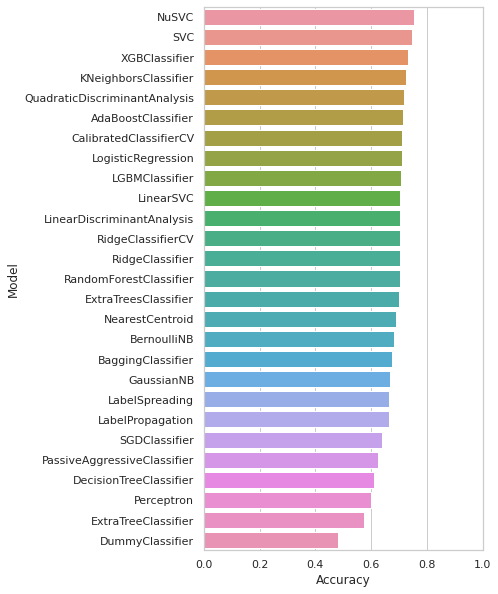

In [85]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

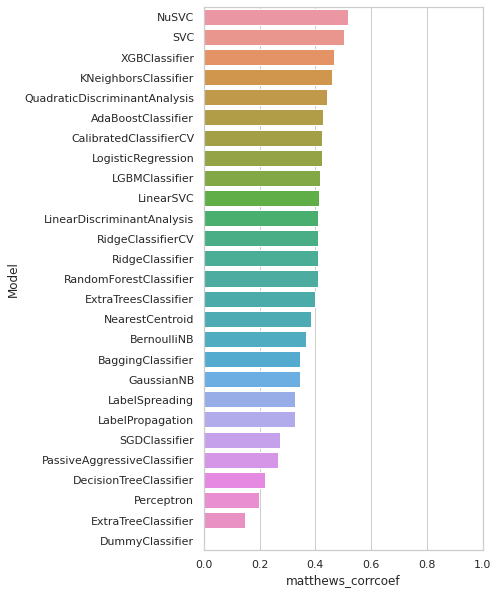

In [86]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

---

# **Random Forest**

In [ ]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

### **Apply the model to make predictions**

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

### **Model performance**

In [ ]:
feature['class']

In [ ]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

In [ ]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

In [ ]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

In [ ]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

In [ ]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

### **Feature importance**

In [ ]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

In [ ]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [ ]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

In [ ]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")

---